# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, I will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, I will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, I will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Prerequisites

Before starting this project, I should have some basic knowledge of Python programming and Pandas. In addition, I may want to use the following packages in your Python environment:

- pandas
- numpy
- seaborn
- matplotlib

These packages should already be installed in Coursera's Jupyter Notebook environment, however if I'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset I will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

I may explore this dataset in any way you would like - however if I'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
!pip install pandas
!pip install matplotlib
!pip install openpyxl

You should consider upgrading via the '/opt/conda/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/conda/bin/python3 -m pip install --upgrade pip' command.
     |████████████████████████████████| 249 kB 41.5 MB/s            
You should consider upgrading via the '/opt/conda/bin/python3 -m pip install --upgrade pip' command.


In [3]:
# Import data
df = pd.read_excel("Online Retail.xlsx")

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Invoice_date,Invoice_time,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2010-12-01,08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,2010-12-01,08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2010-12-01,08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,2010-12-01,08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,2010-12-01,08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     541909 non-null  object        
 1   StockCode     541909 non-null  object        
 2   Description   540455 non-null  object        
 3   Quantity      541909 non-null  int64         
 4   InvoiceDate   541909 non-null  datetime64[ns]
 5   Invoice_date  541909 non-null  datetime64[ns]
 6   Invoice_time  541909 non-null  object        
 7   UnitPrice     541909 non-null  float64       
 8   CustomerID    406829 non-null  float64       
 9   Country       541909 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(5)
memory usage: 41.3+ MB


In [6]:
df.isna().sum()

InvoiceNo            0
StockCode            0
Description       1454
Quantity             0
InvoiceDate          0
Invoice_date         0
Invoice_time         0
UnitPrice            0
CustomerID      135080
Country              0
dtype: int64

In [7]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [11]:
# Adding column named "Customer_spending"

# Create a new column "Customer_spending" in the DataFrame
df['Customer_spending'] = df.apply(lambda row: row['Quantity'] * row['UnitPrice'], axis=1)

# Save the DataFrame to a new Excel file
df.to_excel('my_excel_data_with_Sustomer_spending.xlsx', index=False)

In [12]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Invoice_date,Invoice_time,UnitPrice,CustomerID,Country,Customer_spending
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2010-12-01,08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,2010-12-01,08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2010-12-01,08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,2010-12-01,08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,2010-12-01,08:26:00,3.39,17850.0,United Kingdom,20.34


In [13]:
df.isna().sum()

InvoiceNo                 0
StockCode                 0
Description            1454
Quantity                  0
InvoiceDate               0
Invoice_date              0
Invoice_time              0
UnitPrice                 0
CustomerID           135080
Country                   0
Customer_spending         0
dtype: int64

In [14]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Invoice_date', 'Invoice_time', 'UnitPrice', 'CustomerID', 'Country',
       'Customer_spending'],
      dtype='object')

In [15]:
#Drop rows contain 0 of column "UnitPrice"
df_v2=df[df['UnitPrice'] !=0]

In [16]:
df_v2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Invoice_date,Invoice_time,UnitPrice,CustomerID,Country,Customer_spending
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2010-12-01,08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,2010-12-01,08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2010-12-01,08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,2010-12-01,08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,2010-12-01,08:26:00,3.39,17850.0,United Kingdom,20.34


In [17]:
df_v2.describe()

,Quantity,UnitPrice,CustomerID,Customer_spending
count,539394.000000,539394.000000,406789.000000,539394.000000
mean,9.845871,4.632614,15287.795830,18.071665
std,215.412253,96.984656,1713.573064,379.690931
min,-80995.000000,-11062.060000,12346.000000,-168469.600000
25%,1.000000,1.250000,13954.000000,3.750000
50%,3.000000,2.080000,15152.000000,9.840000
75%,10.000000,4.130000,16791.000000,17.400000
max,80995.000000,38970.000000,18287.000000,168469.600000


In [18]:
# Group the data by country and calculate the average customer spending

# Group the data by country
grouped_data=df_v2.groupby("Country")

# Calculate the average customer spending for each country
avg_spending_per_country=grouped_data["Customer_spending"].mean()
avg_spending_per_country

Country
Australia               109.137954
Austria                  25.322494
Bahrain                  28.863158
Belgium                  19.773301
Brazil                   35.737500
Canada                   24.280662
Channel Islands          26.499063
Cyprus                   20.813971
Czech Republic           23.590667
Denmark                  48.247147
EIRE                     32.138284
European Community       21.176230
Finland                  32.124806
France                   23.071985
Germany                  23.353862
Greece                   32.263836
Hong Kong                35.128611
Iceland                  23.681319
Israel                   26.625657
Italy                    21.034259
Japan                    98.716816
Lebanon                  37.641778
Lithuania                47.458857
Malta                    19.728110
Netherlands             120.262586
Norway                   32.408719
Poland                   21.152903
Portugal                 19.333127
RSA         

In [19]:
average_spending=df_v2['Customer_spending'].mean()
average_spending

18.071665487571554

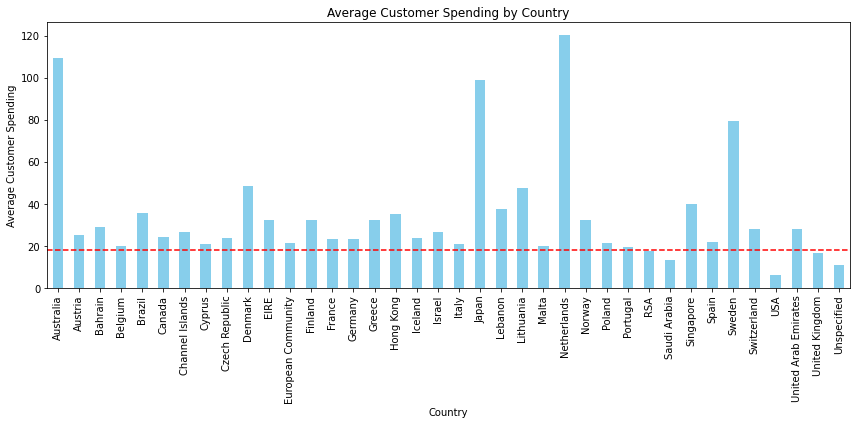

In [20]:
# Create a bar chart of country-wise average spending
plt.figure(figsize=(12,6))
avg_spending_per_country.plot(kind='bar', color='skyblue')
plt.axhline(average_spending, color='red', linestyle='--', label='Overall average')
plt.title('Average Customer Spending by Country')
plt.xlabel('Country')
plt.ylabel('Average Customer Spending')
plt.xticks(rotation=90) # Rotate x-axis labels for readability
plt.tight_layout()
plt.show();

In [21]:
#Finding top 10 spending countries
top_10_spending_countries=avg_spending_per_country.sort_values(ascending=False).head(10)
top_10_spending_countries

Country
Netherlands    120.262586
Australia      109.137954
Japan           98.716816
Sweden          79.211926
Denmark         48.247147
Lithuania       47.458857
Singapore       39.827031
Lebanon         37.641778
Brazil          35.737500
Hong Kong       35.128611
Name: Customer_spending, dtype: float64

## Finding outliner

In [22]:
#Calculation of outliners using Z-score
Q1 = avg_spending_per_country.quantile(0.25)
Q3 = avg_spending_per_country.quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = avg_spending_per_country[(avg_spending_per_country < lower_bound) | (avg_spending_per_country > upper_bound)]
outliers

Country
Australia      109.137954
Japan           98.716816
Netherlands    120.262586
Sweden          79.211926
Name: Customer_spending, dtype: float64

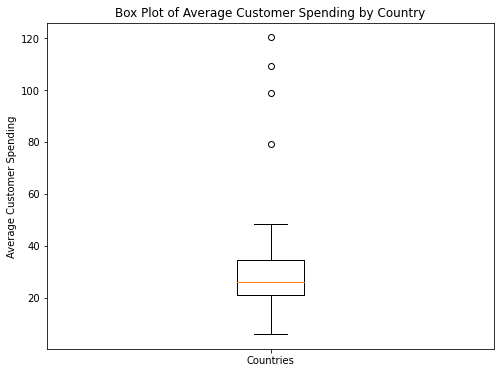

In [23]:
from matplotlib.cbook import boxplot_stats
# Create a box plot of the average spending per country
plt.figure(figsize=(8, 6))
plt.boxplot(avg_spending_per_country)
plt.title('Box Plot of Average Customer Spending by Country')
plt.ylabel('Average Customer Spending')
plt.xticks([1], ['Countries'])
plt.show();

# Extract outlier data points
outliers=boxplot_stats(avg_spending_per_country)

In [24]:
# Group the data by month and day of the week

# Ensure the data is in the correct format
df_v2['Invoice_date'] = pd.to_datetime(df_v2['Invoice_date'])

df_v2['Month'] = df_v2['Invoice_date'].dt.month
df_v2['DayOfWeek'] = df_v2['Invoice_date'].dt.dayofweek

In [25]:
# Calculate the total sales for each month and day of the week
monthly_sales = df_v2.groupby('Month')['Customer_spending'].sum()
day_of_week_sales = df_v2.groupby('DayOfWeek')['Customer_spending'].sum()

In [26]:
unique_days = df_v2['DayOfWeek'].unique()
unique_days

array([2, 3, 4, 6, 0, 1])

In [27]:
df_v2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539394 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   InvoiceNo          539394 non-null  object        
 1   StockCode          539394 non-null  object        
 2   Description        539394 non-null  object        
 3   Quantity           539394 non-null  int64         
 4   InvoiceDate        539394 non-null  datetime64[ns]
 5   Invoice_date       539394 non-null  datetime64[ns]
 6   Invoice_time       539394 non-null  object        
 7   UnitPrice          539394 non-null  float64       
 8   CustomerID         406789 non-null  float64       
 9   Country            539394 non-null  object        
 10  Customer_spending  539394 non-null  float64       
 11  Month              539394 non-null  int64         
 12  DayOfWeek          539394 non-null  int64         
dtypes: datetime64[ns](2), float64(3), int64(3), 

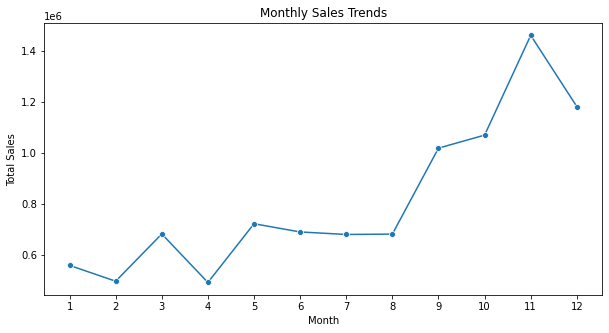

In [28]:
# Creating a line plot to show monthly sales trends
plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(monthly_sales.index)
plt.show()

### So, the monthly sales trends showing that sales starts growing from July and continue upto November.

### Busiest Months:

To identify the busiest months, I need to sort the monthly sales data:

In [29]:
busiest_months=monthly_sales.sort_values(ascending=False)
print("Busiest Months:")
print(busiest_months)

Busiest Months:
Month
11    1461756.250
12    1182625.030
10    1070704.670
9     1019687.622
5      723333.510
6      691123.120
3      683267.080
8      682680.510
7      681300.111
1      560000.260
2      498062.650
4      493207.121
Name: Customer_spending, dtype: float64


### So, the top busiest months are September, October, November and December. But from December down-trend starts.

### Sales Trends by Day of the Week:

I will create a bar plot to visualize sales trends by day of the week:


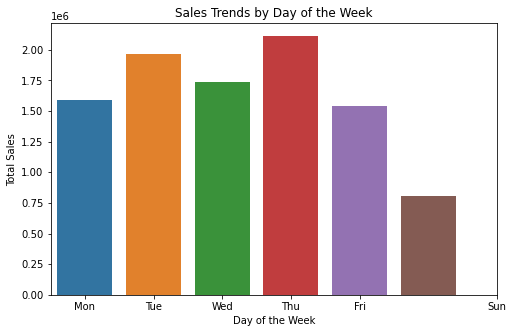

In [31]:
# Creating a bar plot to show day of week sales trends

# Converting day_of_week_sales to a pandas Series
day_of_week_sales = pd.Series(day_of_week_sales)

plt.figure(figsize=(8, 5))
sns.barplot(x=day_of_week_sales.index, y=day_of_week_sales.values)
plt.title('Sales Trends by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.xticks(day_of_week_sales.index, ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sun'])
plt.show();

### Busiest Days of the Week:

To identify the busiest days of the week, I will sort the day of the week sales data:

In [32]:
busiest_day=day_of_week_sales.sort_values(ascending=False)
"Busiest Days of the Week:"
busiest_day

DayOfWeek
3    2112519.000
1    1966182.791
2    1734147.010
0    1588609.431
4    1540610.811
6     805678.891
Name: Customer_spending, dtype: float64

### So, the busiest day is Thursday

### Explore the top-selling products and countries based on the quantity sold.

In [33]:
# Group the data by Description and Country, summing the Customer_spending for each combination
product_country_sales=df_v2.groupby(['Description', 'Country'])['Customer_spending'].sum().reset_index()

# Sort the DataFrame by quantity sold in descending order to find the top-selling products and countries
top_selling_products=product_country_sales.sort_values(by='Customer_spending', ascending=False)
top_selling_countries=product_country_sales.groupby('Country')['Customer_spending'].sum().reset_index().sort_values(by='Customer_spending', ascending=False)

# Display the top-selling products and countries
print("Top-Selling Products:")
print(top_selling_products.head(10))  # Display the top 10 products
print("\nTop-Selling Countries:")
print(top_selling_countries.head(10))  # Display the top 10 countries

Top-Selling Products:
                              Description         Country  Customer_spending
5074                       DOTCOM POSTAGE  United Kingdom          206245.48
13904            REGENCY CAKESTAND 3 TIER  United Kingdom          134405.94
19056  WHITE HANGING HEART T-LIGHT HOLDER  United Kingdom           93953.07
11553                       PARTY BUNTING  United Kingdom           92501.73
8533              JUMBO BAG RED RETROSPOT  United Kingdom           84516.44
11394     PAPER CHAIN KIT 50'S CHRISTMAS   United Kingdom           61888.19
1145        ASSORTED COLOUR BIRD ORNAMENT  United Kingdom           54662.15
3671                        CHILLI LIGHTS  United Kingdom           52986.86
11818      PICNIC BASKET WICKER 60 PIECES  United Kingdom           39619.50
1830             BLACK RECORD COVER FRAME  United Kingdom           39387.00

Top-Selling Countries:
           Country  Customer_spending
36  United Kingdom        8187806.364
24     Netherlands         2846

### So, top-selling product is DOTCOM POSTAGE and the country is UK and top selling country is UK

## Exploratory Data Analysis Summary

#### Dataset Overview:
The dataset contains Online Retail data, including following information: 

InvoiceNo: Invoice number of the transaction
StockCode: Unique code of the product
Description: Description of the product
Quantity: Quantity of the product in the transaction
InvoiceDate: Date and time of the transaction
UnitPrice: Unit price of the product
CustomerID: Unique identifier of the customer
Country: Country where the transaction occurred

The analysis focused on understanding sales trends, identifying top-selling products, determining popular countries, finding ouliners.

#### Sales Trends Over Time:
Monthly sales trends show that there is a noticeable increase in sales from July to December and from end of December it starts falling. Possibly indicating seasonal patterns or promotions.


#### Top-Selling Products: 
Some top-selling products are DOTCOM POSTAGE, REGENCY CAKESTAND 3 TIER, WHITE HANGING HEART T-LIGHT HOLDER and PARTY BUNTING. Understanding the characteristics of these top-selling products can help in making inventory and marketing decisions.
 

#### Top-Selling Countries: 
The analysis also identified the top-selling countries based on the quantity of products sold. Top-selling countries are United Kingdom, Netherlands, EIRE, Germany. Focusing marketing efforts and expanding operations in these countries may be beneficial.    

#### Customer Spending: 
Customer spending was calculated using unit price and quantity, providing insights into customer behavior. This is also useful to set marketing strategy as per customer demography.


#### Day of the Week Analysis: 
Sales trends by day of the week indicated that certain days have higher sales than others. Tuesday and Sunday were top trading days. Exploring why these variations occur, such as special promotions on specific days, can provide insights for optimizing sales strategies.

#### Outliners: 
Outliners countries were Australia, Japan, Netherlands and Sweden. Further analysis and details data are required to find the reasons of outliners.   

#### Recommendations: 
Consider conducting further analysis to understand the underlying factors driving sales trends and seasonal variations. Explore the characteristics of top-selling products to inform inventory management and product offerings. Focus marketing efforts on the top-selling countries to maximize revenue potential. Segment customers based on spending patterns for personalized marketing campaigns. Investigate the reasons behind variations in sales by day of the week to optimize promotions and operations.
  

#### Conclusion: 
The exploratory data analysis has provided valuable insights into sales trends, top-selling products, and countries. These findings can serve as a foundation for making data-driven decisions to improve business operations and revenue.    
